In [1]:
#THIS CODE ONLY DO THE WHOLE DATA TRAINING, NO CROSS_VALIDATION AND FEATURE SELECTION
import pandas as pd
import numpy as np
import newSom
import experiment
import dataset_read
import researchpy as rp
import scipy.stats as stats
import matplotlib.pyplot as plt
import collections
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [2]:
dataread = dataset_read.DATAREAD()

In [3]:
csv = pd.read_csv("Netflix Userbase.csv")
csv = csv.drop(columns=['User ID','Plan Duration'])
csv_original_encode = csv


# class label do not need to onehot encoding
dataread.label_encoding(csv_original_encode,"Subscription Type")
#one hot encoding vs proposed
dataread.hash_encoding(csv_original_encode,["Country","Gender","Device"])

dataread.label_encoding(csv,"Subscription Type")
dataread.label_encoding(csv,"Country")
dataread.label_encoding(csv,"Gender")
dataread.label_encoding(csv,"Device")


csv_test = csv.sample(int(csv.shape[0]*0.3))
csv_training = csv.drop(csv_test.index,axis = 0)

csv_test_original_encoded = dataread.original_encoding_data.sample(int(dataread.original_encoding_data.shape[0]*0.3))
csv_training_original_encoded = dataread.original_encoding_data.drop(csv_test_original_encoded.index,axis = 0)

dataread.initializedataset(csv,csv_training,csv_test,csv_training_original_encoded,csv_test_original_encoded,"Subscription Type")


self.data_continuous_indexes ['Join Date', 'Last Payment Date', 'Age']
 column number self.data_train_discrete 4


neuron unit number: 5
train_discrete_score_W0_p 0.396
 nmi y_true[0 1 0 ... 1 0 2] unique[0 1 2] y_pred [0 0 0 ... 0 0 0] unique [0]
train_discrete_score_W0_n 0.0
train_discrete_score_W0_a  0.0
test_discrete_score_W0_p 0.408
 nmi y_true[1 2 0 2 0 2 0 0 2 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 2 0 2 0 0 1 0 0 1 2 2 1 0
 0 1 2 0 2 0 1 0 1 0 2 0 0 2 2 0 2 2 1 1 0 0 2 0 2 1 2 1 2 2 0 0 0 0 0 2 1
 0 2 2 0 0 0 0 0 0 1 2 2 2 2 2 1 2 0 1 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 2 1 2 2 2 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 1 0 0 1 1 0 0 1 2 1 0
 2 0 0 1 1 0 2 0 0 0 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2 1 1 2 0 2 2 1 2 0 2 1
 1 1 0 0 2 1 0 1 1 0 0 1 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 1 1 1 0 0 1 0 2
 0 0 2 0 1 2 0 2 0 0 2 2 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 0 1 0 0 2 0 1 1 0
 1 0 2 0 1 1 2 0 1 0 0 1 2 1 0 1 0 0 2 0 2 0 2 1 1 1 2 2 1 1 0 0 0 0 2 0 0
 0 2 1 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 1 0 2 2 0 0 2 2 1 0 2 0 1 0 0 2
 1 0 0 1 2 0 1 1 0 2 2 1 2 1 0 1 2 0 0 0 0 1 0 2 0 1 2 1 0 2 2 2 2 0 1 2 2
 1 1 2 0 2 2 0

train_discrete_score_W_discrete_p 0.6005714285714285
 nmi y_true[0 1 0 ... 1 0 2] unique[0 1 2] y_pred [0 2 0 ... 1 0 2] unique [0 1 2]
train_discrete_score_W_discrete_n 0.16184363612033315
train_discrete_score_W_discrete_a 0.17630124897691543
test_discrete_score_W_discrete_p 0.6333333333333333
 nmi y_true[1 2 0 2 0 2 0 0 2 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 2 0 2 0 0 1 0 0 1 2 2 1 0
 0 1 2 0 2 0 1 0 1 0 2 0 0 2 2 0 2 2 1 1 0 0 2 0 2 1 2 1 2 2 0 0 0 0 0 2 1
 0 2 2 0 0 0 0 0 0 1 2 2 2 2 2 1 2 0 1 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 2 1 2 2 2 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 1 0 0 1 1 0 0 1 2 1 0
 2 0 0 1 1 0 2 0 0 0 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2 1 1 2 0 2 2 1 2 0 2 1
 1 1 0 0 2 1 0 1 1 0 0 1 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 1 1 1 0 0 1 0 2
 0 0 2 0 1 2 0 2 0 0 2 2 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 0 1 0 0 2 0 1 1 0
 1 0 2 0 1 1 2 0 1 0 0 1 2 1 0 1 0 0 2 0 2 0 2 1 1 1 2 2 1 1 0 0 0 0 2 0 0
 0 2 1 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 1 0 2 2 0 0 2 2 1 0 2 0 1 0 0 2
 1 0 0 1 2 0 1 1 0

train_discrete_score_W0_p 0.4034285714285714
 nmi y_true[0 1 0 ... 1 0 2] unique[0 1 2] y_pred [0 0 1 ... 0 0 0] unique [0 1]
train_discrete_score_W0_n 0.00513095002956168
train_discrete_score_W0_a  0.009555748548778715
test_discrete_score_W0_p 0.44
 nmi y_true[1 2 0 2 0 2 0 0 2 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 2 0 2 0 0 1 0 0 1 2 2 1 0
 0 1 2 0 2 0 1 0 1 0 2 0 0 2 2 0 2 2 1 1 0 0 2 0 2 1 2 1 2 2 0 0 0 0 0 2 1
 0 2 2 0 0 0 0 0 0 1 2 2 2 2 2 1 2 0 1 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 2 1 2 2 2 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 1 0 0 1 1 0 0 1 2 1 0
 2 0 0 1 1 0 2 0 0 0 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2 1 1 2 0 2 2 1 2 0 2 1
 1 1 0 0 2 1 0 1 1 0 0 1 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 1 1 1 0 0 1 0 2
 0 0 2 0 1 2 0 2 0 0 2 2 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 0 1 0 0 2 0 1 1 0
 1 0 2 0 1 1 2 0 1 0 0 1 2 1 0 1 0 0 2 0 2 0 2 1 1 1 2 2 1 1 0 0 0 0 2 0 0
 0 2 1 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 1 0 2 2 0 0 2 2 1 0 2 0 1 0 0 2
 1 0 0 1 2 0 1 1 0 2 2 1 2 1 0 1 2 0 0 0 0 1 0 2 0 1 2 1 0 2 2 2

train_discrete_score_W_discrete_p 0.6497142857142857
 nmi y_true[0 1 0 ... 1 0 2] unique[0 1 2] y_pred [0 2 0 ... 2 0 2] unique [0 1 2]
train_discrete_score_W_discrete_n 0.22223556524841165
train_discrete_score_W_discrete_a 0.223522430350984
test_discrete_score_W_discrete_p 0.6773333333333333
 nmi y_true[1 2 0 2 0 2 0 0 2 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 2 0 2 0 0 1 0 0 1 2 2 1 0
 0 1 2 0 2 0 1 0 1 0 2 0 0 2 2 0 2 2 1 1 0 0 2 0 2 1 2 1 2 2 0 0 0 0 0 2 1
 0 2 2 0 0 0 0 0 0 1 2 2 2 2 2 1 2 0 1 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 2 1 2 2 2 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 1 0 0 1 1 0 0 1 2 1 0
 2 0 0 1 1 0 2 0 0 0 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2 1 1 2 0 2 2 1 2 0 2 1
 1 1 0 0 2 1 0 1 1 0 0 1 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 1 1 1 0 0 1 0 2
 0 0 2 0 1 2 0 2 0 0 2 2 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 0 1 0 0 2 0 1 1 0
 1 0 2 0 1 1 2 0 1 0 0 1 2 1 0 1 0 0 2 0 2 0 2 1 1 1 2 2 1 1 0 0 0 0 2 0 0
 0 2 1 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 1 0 2 2 0 0 2 2 1 0 2 0 1 0 0 2
 1 0 0 1 2 0 1 1 0 2

train_discrete_score_W0_p 0.41085714285714287
 nmi y_true[0 1 0 ... 1 0 2] unique[0 1 2] y_pred [0 0 0 ... 0 0 0] unique [0 1 2]
train_discrete_score_W0_n 0.006222074441014542
train_discrete_score_W0_a  0.008010771472201259
test_discrete_score_W0_p 0.4493333333333333
 nmi y_true[1 2 0 2 0 2 0 0 2 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 2 0 2 0 0 1 0 0 1 2 2 1 0
 0 1 2 0 2 0 1 0 1 0 2 0 0 2 2 0 2 2 1 1 0 0 2 0 2 1 2 1 2 2 0 0 0 0 0 2 1
 0 2 2 0 0 0 0 0 0 1 2 2 2 2 2 1 2 0 1 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 2 1 2 2 2 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 1 0 0 1 1 0 0 1 2 1 0
 2 0 0 1 1 0 2 0 0 0 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2 1 1 2 0 2 2 1 2 0 2 1
 1 1 0 0 2 1 0 1 1 0 0 1 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 1 1 1 0 0 1 0 2
 0 0 2 0 1 2 0 2 0 0 2 2 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 0 1 0 0 2 0 1 1 0
 1 0 2 0 1 1 2 0 1 0 0 1 2 1 0 1 0 0 2 0 2 0 2 1 1 1 2 2 1 1 0 0 0 0 2 0 0
 0 2 1 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 1 0 2 2 0 0 2 2 1 0 2 0 1 0 0 2
 1 0 0 1 2 0 1 1 0 2 2 1 2 1 0 1 2 0 0 0 0 1 0

train_discrete_score_W_discrete_p 0.652
 nmi y_true[0 1 0 ... 1 0 2] unique[0 1 2] y_pred [0 1 0 ... 1 0 2] unique [0 1 2]
train_discrete_score_W_discrete_n 0.21782098791245424
train_discrete_score_W_discrete_a 0.22556906336854615
test_discrete_score_W_discrete_p 0.6773333333333333
 nmi y_true[1 2 0 2 0 2 0 0 2 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 2 0 2 0 0 1 0 0 1 2 2 1 0
 0 1 2 0 2 0 1 0 1 0 2 0 0 2 2 0 2 2 1 1 0 0 2 0 2 1 2 1 2 2 0 0 0 0 0 2 1
 0 2 2 0 0 0 0 0 0 1 2 2 2 2 2 1 2 0 1 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 2 1 2 2 2 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 1 0 0 1 1 0 0 1 2 1 0
 2 0 0 1 1 0 2 0 0 0 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2 1 1 2 0 2 2 1 2 0 2 1
 1 1 0 0 2 1 0 1 1 0 0 1 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 1 1 1 0 0 1 0 2
 0 0 2 0 1 2 0 2 0 0 2 2 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 0 1 0 0 2 0 1 1 0
 1 0 2 0 1 1 2 0 1 0 0 1 2 1 0 1 0 0 2 0 2 0 2 1 1 1 2 2 1 1 0 0 0 0 2 0 0
 0 2 1 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 1 0 2 2 0 0 2 2 1 0 2 0 1 0 0 2
 1 0 0 1 2 0 1 1 0 2 2 1 2 1 0 

train_discrete_score_W0_p 0.416
 nmi y_true[0 1 0 ... 1 0 2] unique[0 1 2] y_pred [0 0 0 ... 2 1 2] unique [0 1 2]
train_discrete_score_W0_n 0.008387849769037928
train_discrete_score_W0_a  0.011243639693495622
test_discrete_score_W0_p 0.44533333333333336
 nmi y_true[1 2 0 2 0 2 0 0 2 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 2 0 2 0 0 1 0 0 1 2 2 1 0
 0 1 2 0 2 0 1 0 1 0 2 0 0 2 2 0 2 2 1 1 0 0 2 0 2 1 2 1 2 2 0 0 0 0 0 2 1
 0 2 2 0 0 0 0 0 0 1 2 2 2 2 2 1 2 0 1 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 2 1 2 2 2 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 1 0 0 1 1 0 0 1 2 1 0
 2 0 0 1 1 0 2 0 0 0 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2 1 1 2 0 2 2 1 2 0 2 1
 1 1 0 0 2 1 0 1 1 0 0 1 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 1 1 1 0 0 1 0 2
 0 0 2 0 1 2 0 2 0 0 2 2 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 0 1 0 0 2 0 1 1 0
 1 0 2 0 1 1 2 0 1 0 0 1 2 1 0 1 0 0 2 0 2 0 2 1 1 1 2 2 1 1 0 0 0 0 2 0 0
 0 2 1 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 1 0 2 2 0 0 2 2 1 0 2 0 1 0 0 2
 1 0 0 1 2 0 1 1 0 2 2 1 2 1 0 1 2 0 0 0 0 1 0 2 0 1 2 1 0 

train_discrete_score_W_discrete_p 0.6497142857142857
 nmi y_true[0 1 0 ... 1 0 2] unique[0 1 2] y_pred [0 1 0 ... 1 0 2] unique [0 1 2]
train_discrete_score_W_discrete_n 0.24871596847388844
train_discrete_score_W_discrete_a 0.21997204900119496
test_discrete_score_W_discrete_p 0.6786666666666666
 nmi y_true[1 2 0 2 0 2 0 0 2 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 2 0 2 0 0 1 0 0 1 2 2 1 0
 0 1 2 0 2 0 1 0 1 0 2 0 0 2 2 0 2 2 1 1 0 0 2 0 2 1 2 1 2 2 0 0 0 0 0 2 1
 0 2 2 0 0 0 0 0 0 1 2 2 2 2 2 1 2 0 1 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 2 1 2 2 2 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 1 0 0 1 1 0 0 1 2 1 0
 2 0 0 1 1 0 2 0 0 0 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2 1 1 2 0 2 2 1 2 0 2 1
 1 1 0 0 2 1 0 1 1 0 0 1 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 1 1 1 0 0 1 0 2
 0 0 2 0 1 2 0 2 0 0 2 2 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 0 1 0 0 2 0 1 1 0
 1 0 2 0 1 1 2 0 1 0 0 1 2 1 0 1 0 0 2 0 2 0 2 1 1 1 2 2 1 1 0 0 0 0 2 0 0
 0 2 1 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 1 0 2 2 0 0 2 2 1 0 2 0 1 0 0 2
 1 0 0 1 2 0 1 1 0

train_discrete_score_W0_p 0.4188571428571429
 nmi y_true[0 1 0 ... 1 0 2] unique[0 1 2] y_pred [0 0 0 ... 0 0 0] unique [0 1 2]
train_discrete_score_W0_n 0.008519808146312036
train_discrete_score_W0_a  0.013567229776284455
test_discrete_score_W0_p 0.45866666666666667
 nmi y_true[1 2 0 2 0 2 0 0 2 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 2 0 2 0 0 1 0 0 1 2 2 1 0
 0 1 2 0 2 0 1 0 1 0 2 0 0 2 2 0 2 2 1 1 0 0 2 0 2 1 2 1 2 2 0 0 0 0 0 2 1
 0 2 2 0 0 0 0 0 0 1 2 2 2 2 2 1 2 0 1 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 2 1 2 2 2 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 1 0 0 1 1 0 0 1 2 1 0
 2 0 0 1 1 0 2 0 0 0 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2 1 1 2 0 2 2 1 2 0 2 1
 1 1 0 0 2 1 0 1 1 0 0 1 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 1 1 1 0 0 1 0 2
 0 0 2 0 1 2 0 2 0 0 2 2 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 0 1 0 0 2 0 1 1 0
 1 0 2 0 1 1 2 0 1 0 0 1 2 1 0 1 0 0 2 0 2 0 2 1 1 1 2 2 1 1 0 0 0 0 2 0 0
 0 2 1 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 1 0 2 2 0 0 2 2 1 0 2 0 1 0 0 2
 1 0 0 1 2 0 1 1 0 2 2 1 2 1 0 1 2 0 0 0 0 1 0

train_discrete_score_W_discrete_p 0.6531428571428571
 nmi y_true[0 1 0 ... 1 0 2] unique[0 1 2] y_pred [0 1 0 ... 1 0 2] unique [0 1 2]
train_discrete_score_W_discrete_n 0.20995153637615896
train_discrete_score_W_discrete_a 0.22963826353301245
test_discrete_score_W_discrete_p 0.6813333333333333
 nmi y_true[1 2 0 2 0 2 0 0 2 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 2 0 2 0 0 1 0 0 1 2 2 1 0
 0 1 2 0 2 0 1 0 1 0 2 0 0 2 2 0 2 2 1 1 0 0 2 0 2 1 2 1 2 2 0 0 0 0 0 2 1
 0 2 2 0 0 0 0 0 0 1 2 2 2 2 2 1 2 0 1 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 2 1 2 2 2 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 1 0 0 1 1 0 0 1 2 1 0
 2 0 0 1 1 0 2 0 0 0 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2 1 1 2 0 2 2 1 2 0 2 1
 1 1 0 0 2 1 0 1 1 0 0 1 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 1 1 1 0 0 1 0 2
 0 0 2 0 1 2 0 2 0 0 2 2 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 0 1 0 0 2 0 1 1 0
 1 0 2 0 1 1 2 0 1 0 0 1 2 1 0 1 0 0 2 0 2 0 2 1 1 1 2 2 1 1 0 0 0 0 2 0 0
 0 2 1 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 1 0 2 2 0 0 2 2 1 0 2 0 1 0 0 2
 1 0 0 1 2 0 1 1 0

train_discrete_score_W0_p 0.4154285714285714
 nmi y_true[0 1 0 ... 1 0 2] unique[0 1 2] y_pred [0 0 0 ... 0 0 0] unique [0 1 2]
train_discrete_score_W0_n 0.007464117626758898
train_discrete_score_W0_a  0.010990550373508087
test_discrete_score_W0_p 0.456
 nmi y_true[1 2 0 2 0 2 0 0 2 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 2 0 2 0 0 1 0 0 1 2 2 1 0
 0 1 2 0 2 0 1 0 1 0 2 0 0 2 2 0 2 2 1 1 0 0 2 0 2 1 2 1 2 2 0 0 0 0 0 2 1
 0 2 2 0 0 0 0 0 0 1 2 2 2 2 2 1 2 0 1 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 2 1 2 2 2 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 1 0 0 1 1 0 0 1 2 1 0
 2 0 0 1 1 0 2 0 0 0 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2 1 1 2 0 2 2 1 2 0 2 1
 1 1 0 0 2 1 0 1 1 0 0 1 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 1 1 1 0 0 1 0 2
 0 0 2 0 1 2 0 2 0 0 2 2 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 0 1 0 0 2 0 1 1 0
 1 0 2 0 1 1 2 0 1 0 0 1 2 1 0 1 0 0 2 0 2 0 2 1 1 1 2 2 1 1 0 0 0 0 2 0 0
 0 2 1 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 1 0 2 2 0 0 2 2 1 0 2 0 1 0 0 2
 1 0 0 1 2 0 1 1 0 2 2 1 2 1 0 1 2 0 0 0 0 1 0 2 0 1 2 1 0 2

train_discrete_score_W_discrete_p 0.656
 nmi y_true[0 1 0 ... 1 0 2] unique[0 1 2] y_pred [0 1 0 ... 1 0 2] unique [0 1 2]
train_discrete_score_W_discrete_n 0.22752870213375043
train_discrete_score_W_discrete_a 0.23181359337351312
test_discrete_score_W_discrete_p 0.6906666666666667
 nmi y_true[1 2 0 2 0 2 0 0 2 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 2 0 2 0 0 1 0 0 1 2 2 1 0
 0 1 2 0 2 0 1 0 1 0 2 0 0 2 2 0 2 2 1 1 0 0 2 0 2 1 2 1 2 2 0 0 0 0 0 2 1
 0 2 2 0 0 0 0 0 0 1 2 2 2 2 2 1 2 0 1 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 2 1 2 2 2 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 1 0 0 1 1 0 0 1 2 1 0
 2 0 0 1 1 0 2 0 0 0 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2 1 1 2 0 2 2 1 2 0 2 1
 1 1 0 0 2 1 0 1 1 0 0 1 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 1 1 1 0 0 1 0 2
 0 0 2 0 1 2 0 2 0 0 2 2 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 0 1 0 0 2 0 1 1 0
 1 0 2 0 1 1 2 0 1 0 0 1 2 1 0 1 0 0 2 0 2 0 2 1 1 1 2 2 1 1 0 0 0 0 2 0 0
 0 2 1 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 1 0 2 2 0 0 2 2 1 0 2 0 1 0 0 2
 1 0 0 1 2 0 1 1 0 2 2 1 2 1 0 

train_discrete_score_W0_p 0.41714285714285715
 nmi y_true[0 1 0 ... 1 0 2] unique[0 1 2] y_pred [0 0 1 ... 0 0 0] unique [0 1 2]
train_discrete_score_W0_n 0.008420204281752509
train_discrete_score_W0_a  0.014952418328665935
test_discrete_score_W0_p 0.456
 nmi y_true[1 2 0 2 0 2 0 0 2 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 2 0 2 0 0 1 0 0 1 2 2 1 0
 0 1 2 0 2 0 1 0 1 0 2 0 0 2 2 0 2 2 1 1 0 0 2 0 2 1 2 1 2 2 0 0 0 0 0 2 1
 0 2 2 0 0 0 0 0 0 1 2 2 2 2 2 1 2 0 1 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 2 1 2 2 2 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 1 0 0 1 1 0 0 1 2 1 0
 2 0 0 1 1 0 2 0 0 0 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2 1 1 2 0 2 2 1 2 0 2 1
 1 1 0 0 2 1 0 1 1 0 0 1 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 1 1 1 0 0 1 0 2
 0 0 2 0 1 2 0 2 0 0 2 2 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 0 1 0 0 2 0 1 1 0
 1 0 2 0 1 1 2 0 1 0 0 1 2 1 0 1 0 0 2 0 2 0 2 1 1 1 2 2 1 1 0 0 0 0 2 0 0
 0 2 1 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 1 0 2 2 0 0 2 2 1 0 2 0 1 0 0 2
 1 0 0 1 2 0 1 1 0 2 2 1 2 1 0 1 2 0 0 0 0 1 0 2 0 1 2 1 0 

train_discrete_score_W_discrete_p 0.6525714285714286
 nmi y_true[0 1 0 ... 1 0 2] unique[0 1 2] y_pred [0 1 0 ... 1 0 2] unique [0 1 2]
train_discrete_score_W_discrete_n 0.21245552039205898
train_discrete_score_W_discrete_a 0.22817712872670548
test_discrete_score_W_discrete_p 0.6866666666666666
 nmi y_true[1 2 0 2 0 2 0 0 2 1 1 1 0 1 1 0 1 1 2 1 0 2 1 0 2 0 2 0 0 1 0 0 1 2 2 1 0
 0 1 2 0 2 0 1 0 1 0 2 0 0 2 2 0 2 2 1 1 0 0 2 0 2 1 2 1 2 2 0 0 0 0 0 2 1
 0 2 2 0 0 0 0 0 0 1 2 2 2 2 2 1 2 0 1 1 2 0 1 0 1 0 2 1 0 1 1 0 1 0 1 0 1
 0 1 0 0 1 2 1 2 2 2 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 1 0 0 1 1 0 0 1 2 1 0
 2 0 0 1 1 0 2 0 0 0 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2 1 1 2 0 2 2 1 2 0 2 1
 1 1 0 0 2 1 0 1 1 0 0 1 0 0 2 0 1 1 1 1 1 1 0 2 0 0 0 0 2 1 1 1 0 0 1 0 2
 0 0 2 0 1 2 0 2 0 0 2 2 0 0 1 0 2 0 2 2 1 0 1 2 2 1 0 2 0 1 0 0 2 0 1 1 0
 1 0 2 0 1 1 2 0 1 0 0 1 2 1 0 1 0 0 2 0 2 0 2 1 1 1 2 2 1 1 0 0 0 0 2 0 0
 0 2 1 2 2 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 1 1 0 2 2 0 0 2 2 1 0 2 0 1 0 0 2
 1 0 0 1 2 0 1 1 0

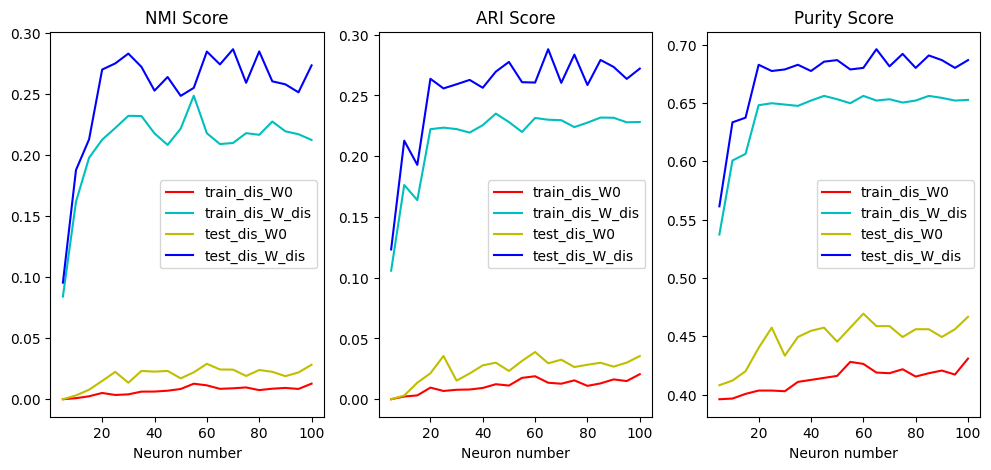

NMI T-Test
          Variable     N      Mean        SD        SE  95% Conf.  Interval
0     train_dis_W0  20.0  0.007073  0.003580  0.000800   0.005398  0.008748
1  train_dis_W_dis  20.0  0.209389  0.033849  0.007569   0.193547  0.225230
2         combined  40.0  0.108231  0.105165  0.016628   0.074597  0.141864
                               Independent t-test  results
0  Difference (train_dis_W0 - train_dis_W_dis) =   -0.2023
1                           Degrees of freedom =   38.0000
2                                            t =  -26.5820
3                        Two side test p value =    0.0000
4                       Difference < 0 p value =    0.0000
5                       Difference > 0 p value =    1.0000
6                                    Cohen's d =   -8.4060
7                                    Hedge's g =   -8.2390
8                               Glass's delta1 =  -56.5186
9                             Point-Biserial r =   -0.9741
         Variable     N      Mean   

In [4]:
# hash encoding

unstable_repeat_num= 30
best_num =26
scope_num = 100
class_num = 5
interval = 5


experiment = experiment.Experiment()
experiment.UTtest_Discrete_Continuous(dataread,False,class_num,best_num, scope_num,unstable_repeat_num,0,interval,1,3)